<a href="https://colab.research.google.com/github/ahcamachod/2162-clasificacion-validacion-de-modelos-y-metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data/prestacar.csv')

data

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [3]:
X = data.drop(columns='moroso', axis=1)
y = data.moroso

In [4]:
# modelo de  clasificacion de arbol
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(X,y)
modelo.score(X,y)

1.0

In [6]:
print(f'La exactitud del modelo es:{modelo.score(X,y)}')

La exactitud del modelo es:1.0


### **Utilidad del método score()**


Durante la construcción de un modelo para clasificar transacciones bancarias como legítimas o fraudulentas, una persona científica de datos utilizó la biblioteca Scikit-Learn, que ofrece diversos algoritmos de machine learning que pueden ser utilizados para la clasificación de datos. En cada uno de estos algoritmos, el método fit() se utiliza para entrenar un modelo a partir de las variables explicativas y la variable respuesta.

Sin embargo, después del entrenamiento del modelo, se realiza un paso más mediante el uso del método score().

    -   Se utiliza para evaluar el desempeño del modelo ajustado.

            El método score() tiene la finalidad de comparar las predicciones realizadas por el modelo con los valores reales de los datos y calcula una tasa de acierto en porcentaje llamada exactitud.  

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [ ]:
from sklearn.model_selection import train_test_split

In [9]:
X, X_test, y, y_test = train_test_split(X,y,test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.15, stratify=y, random_state=5)

In [14]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de:{modelo.score(X_train,y_train)}\nLa exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')


La exactitud del modelo con el conjunto de entrenamiento es de:0.9207829473252716
La exactitud del modelo con el conjunto de validación es de: 0.9065176368123095


### **Para saber más: método holdout**

En el momento de validar modelos de clasificación, necesitamos verificar si el modelo está realmente generalizando, es decir, si está comprendiendo el patrón de los datos y clasificando correctamente datos nuevos. La estrategia más simple para evaluar esta generalización, conocida como holdout, consiste en dividir los datos en dos partes: un conjunto de datos de entrenamiento y otro de prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se usa para evaluar el rendimiento del modelo en datos no vistos anteriormente.

Con la ayuda de la imagen a continuación, analiza la ejemplificación del método holdout en funcionamiento:

![img valmodel1](./data/valmodel1.png)

En algunos casos, especialmente cuando se realizan ajustes finos en los parámetros del modelo, es útil tener un conjunto de validación adicional. En este caso, la división se hace en tres partes: conjunto de entrenamiento, conjunto de validación y conjunto de prueba. El conjunto de validación se utiliza en la comparación de diferentes modelos, en la selección del modelo más adecuado y en el ajuste de los hiperparámetros. Mientras tanto, el conjunto de prueba sigue utilizándose para evaluar el rendimiento final del modelo elegido, después de todo el proceso de ajuste.

Por eso, cuanto más se utilizan los mismos datos para tomar decisiones sobre configuraciones de mejoras en el modelo o elección de hiperparámetros, más comprometida se vuelve la confiabilidad de esos resultados al ser generalizados para datos nuevos y no vistos. Esto ocurre porque las mejoras se hacen a partir de esos datos de validación.

Es posible percibir que las mejoras aplicadas desempeñan un papel fundamental para resolver el problema. Sin embargo, para asegurar que el rendimiento del modelo permanezca consistente en relación a los datos del mundo real, que no fueron vistos en el entrenamiento o en la mejora de los modelos, la estrategia de la división entre 3 conjuntos de datos, como se puede analizar en la imagen siguiente, ofrece una buena dirección final, ya que indica si el modelo elegido está sesgado o no en relación a los datos de validación.


![img valmodel2](./data/valmodel2.png)

### Evaluando el modelo

In [15]:
# Usaremos la herramientras matriz de confusion
from sklearn.metrics import confusion_matrix

In [16]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[6228   60]
 [ 584   17]]


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay


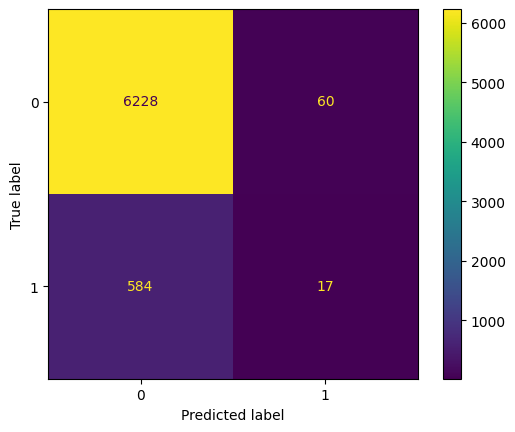

In [22]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

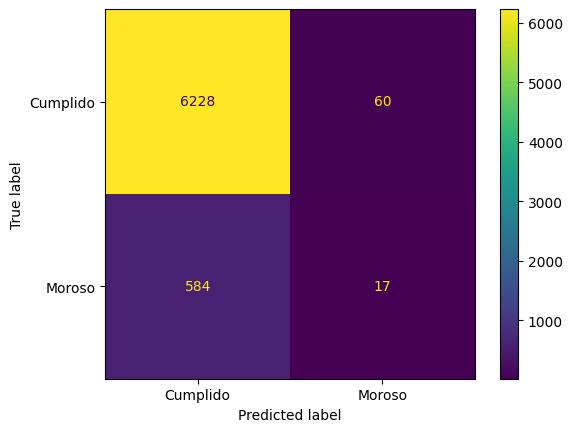

In [23]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizacion.plot();

### **Para saber más: entendiendo la matriz de confusión**

Para obtener una evaluación más completa del desempeño de modelos de clasificación, podemos utilizar una herramienta conocida como matriz de confusión. Esta matriz ofrece ventajas a la persona científica de datos, ya que permite entender cuántos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar información en una visualización para cada una de las categorías de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza cámaras para identificar personas que entran. La "matriz de confusión" se vuelve valiosa, ya que permite verificar cuántas veces el sistema acertó al identificar correctamente a las personas autorizadas, cuántas veces acusó erróneamente a personas y cuántas veces dejó pasar a personas no autorizadas. Con estos números, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisión en la detección de visitantes.

En la representación general de una matriz de confusión, para más detalles analiza la imagen a continuación, las filas de la matriz corresponden a los valores reales de la base de datos, mientras que las columnas corresponden a los valores previstos por el modelo de clasificación. Las categorías de la variable objetivo están representadas por el valor 0 (ausencia del atributo), también llamado negativo, y por el valor 1 (presencia del atributo), también llamado positivo.

![img matriz de confusion](./data/imgMatrizconfusion.png)


Cada elemento de la matriz está identificado por un nombre de acuerdo con la intersección entre la predicción y el valor real. La diagonal principal de la matriz, que está destacada por el color verde, representa los elementos que tienen la predicción igual al valor real, por lo tanto son los aciertos del modelo. Por otro lado, la diagonal secundaria, que está destacada por el color rojo, representa los elementos con predicciones diferentes del valor real, por lo tanto son los errores del modelo. La descripción de cada uno de los elementos es la siguiente:

- **Verdaderos Negativos (VN)**: Cuando el valor real es 0 y la predicción también es 0. Indica que el modelo clasificó correctamente los valores de la clase negativa.
- **Falsos Positivos (FP)**: Cuando el valor real es 0 y la predicción es 1. Indica que el modelo clasificó erróneamente un elemento de la clase negativa como si fuera de la clase positiva.
- **Falsos Negativos (FN)**: Cuando el valor real es 1 y la predicción es 0. Indica que el modelo clasificó erróneamente un elemento de la clase positiva como si fuera de la clase negativa.
- **Verdaderos Positivos (VP)**: Cuando el valor real es 1 y la predicción también es 1. Indica que el modelo clasificó correctamente los valores de la clase positiva.

Estos valores son muy útiles para un análisis más profundo del modelo de clasificación. Esto permite identificar las capacidades y limitaciones de la predicción, si hay un equilibrio entre los aciertos y errores o si el resultado está sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusión es una herramienta mucho más completa que la métrica de precisión, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.

### **Matriz de confusión**

Para evaluar un modelo de clasificación, podemos utilizar la precisión, que es un resultado general de aciertos del modelo expresado en porcentaje. Sin embargo, la precisión no siempre será suficiente para entender cómo está el desempeño del modelo.

Es posible utilizar la matriz de confusión para devolver un resultado más completo en relación al desempeño del modelo, conteniendo la cantidad de aciertos y errores del modelo para cada clase de la variable objetivo. Así, a partir de la matriz de confusión a continuación, que contiene los valores reales en las filas y valores predichos en las columnas y donde el valor 0 representa clientes cumplidores y 1 representa clientes morosos:

![img matriz de confusion](./data/MatrizConfusion.png)

20 representa a los clientes morosos que el modelo clasificó correctamente como morosos.

- Correcto, como la segunda fila representa a los clientes morosos reales y la segunda columna representa la predicción del modelo como morosos, 20 sería la cantidad de personas morosos que el modelo clasificó correctamente como morosos. 


### **Desafío: construyendo un segundo modelo**



Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

Como un consejo, revisa la documentación del algoritmo RandomForestClassifier. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.


### **Desafío: hora de la práctica**



Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este [enlace](./data/diabetes.csv).

1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con <mark>pandas</mark>.

2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro <mark>stratify</mark> a partir de la variable objetivo para mantener la proporción de los datos.

3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) y [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro <mark>max_depth</mark> del algoritmo <mark>DecisionTreeClassifier</mark> y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

4 - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método <mark>predict</mark> para generar las predicciones de los valores y comparar con los valores reales de la base de datos.


## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

### Curva ROC

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




### Curva de  precisión x sensibilidad

In [ ]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


### Informe de métricas

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

### Validación cruzada con sensibilidad

### Estratificando los datos

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo